## Importing required Libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Cheacking the number of unique values in class column and then converting it to numerical datatype 1 for the e and 0 for p.

In [5]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
data['class'] = np.where(data['class']=='e',1,0)

In [7]:
data.shape

(8124, 23)

### Visualizing the count for each feature according to class values. 

In [8]:
import seaborn as sns

In [9]:
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

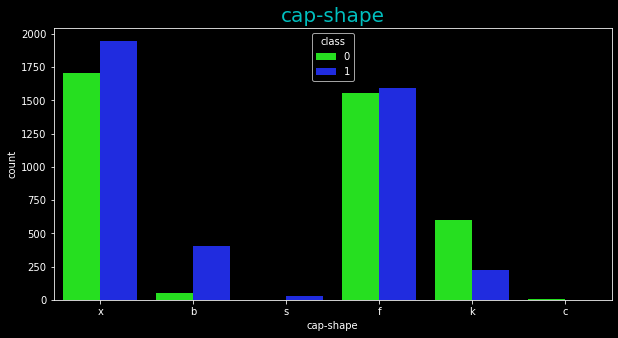

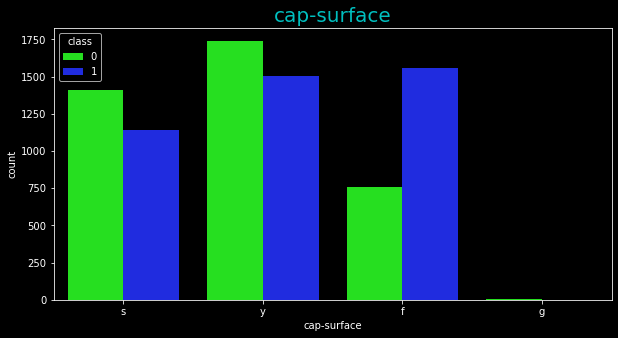

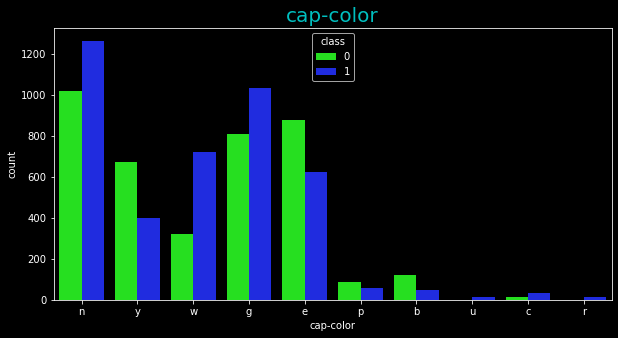

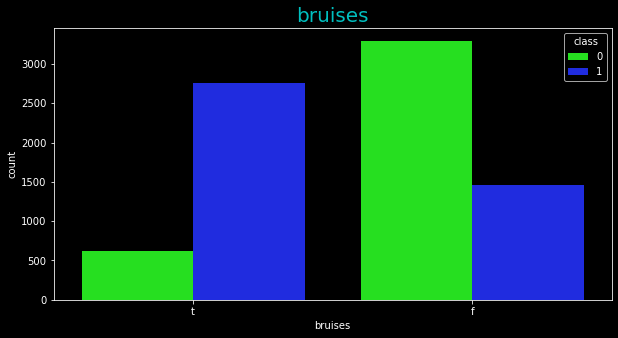

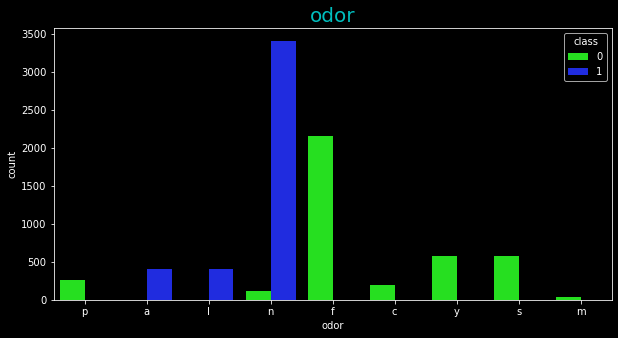

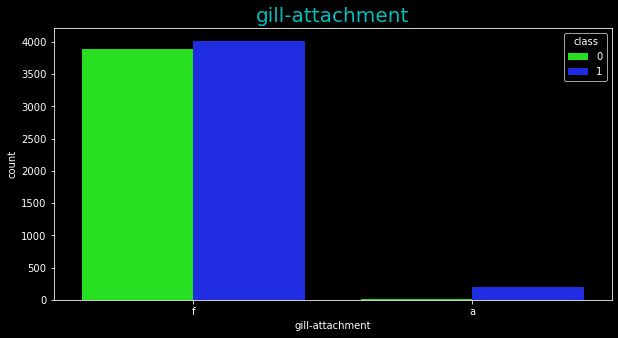

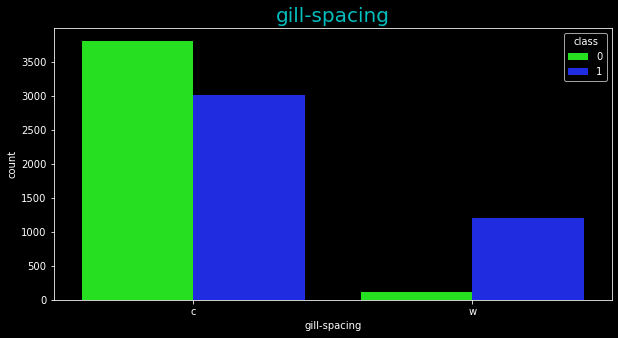

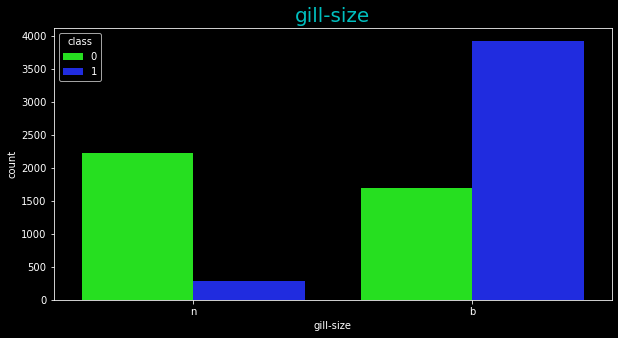

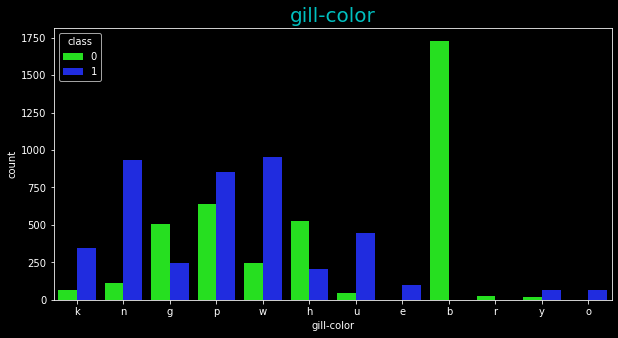

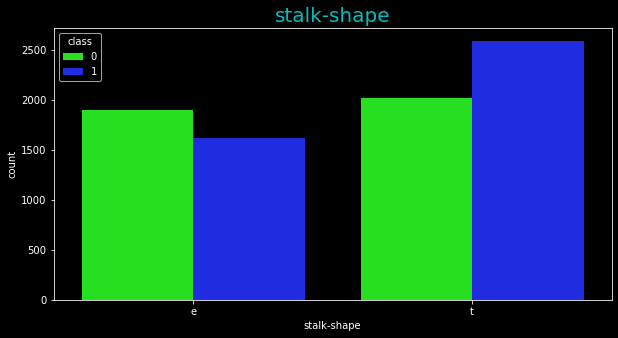

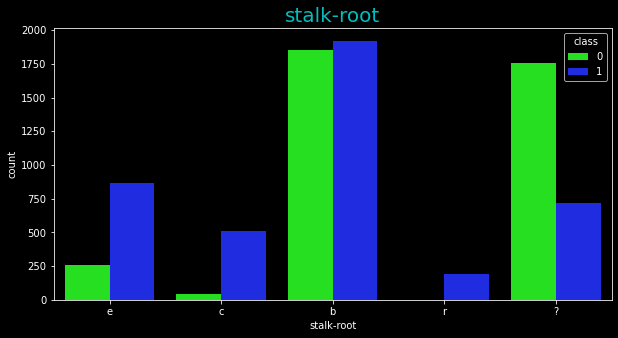

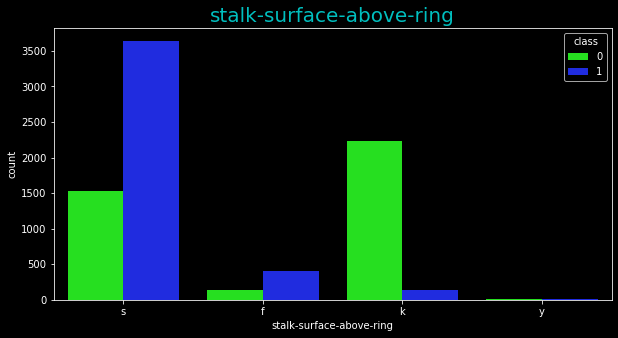

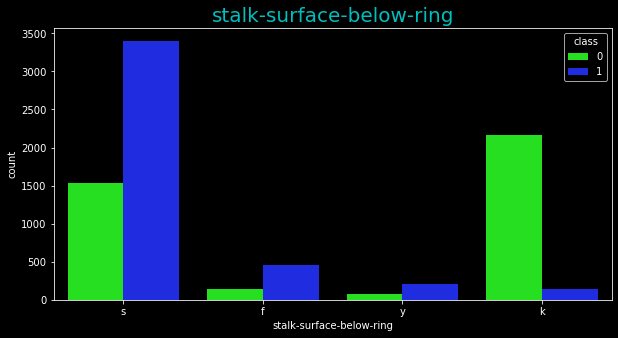

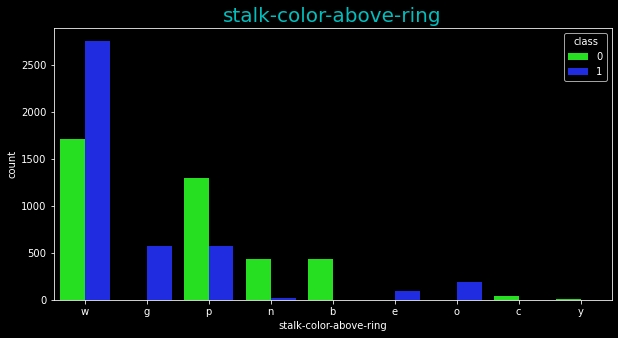

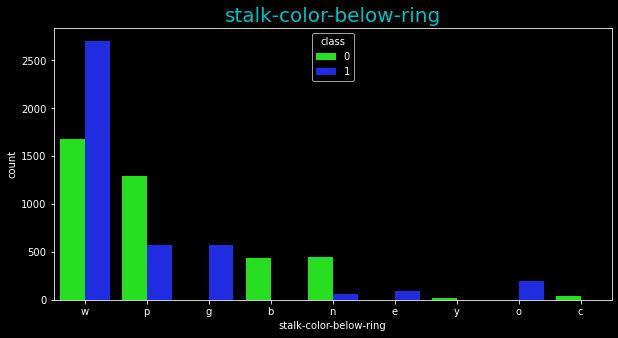

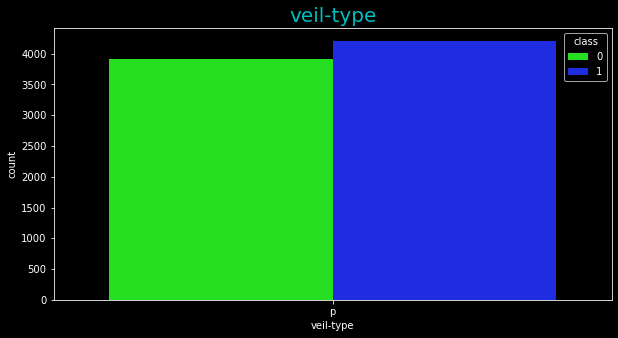

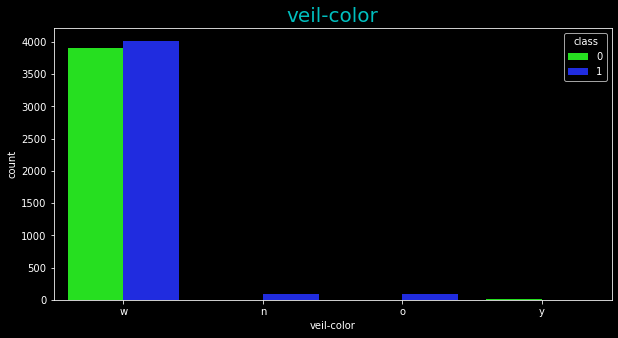

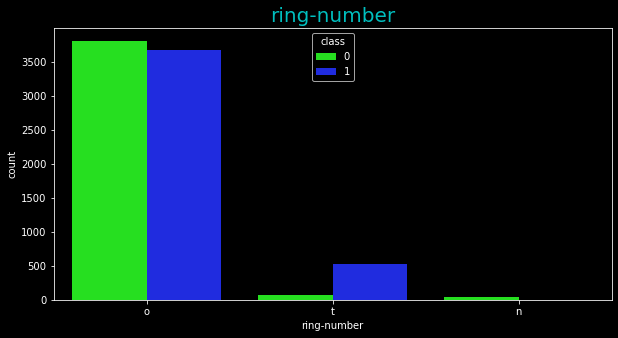

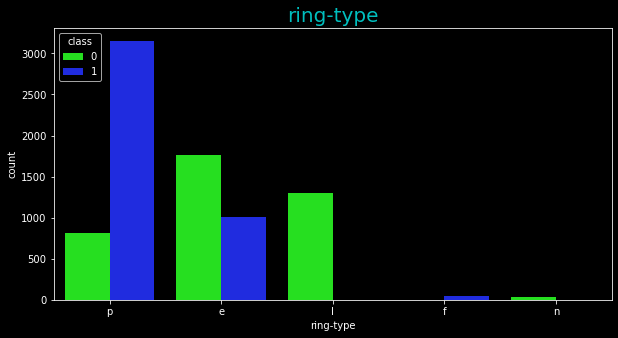

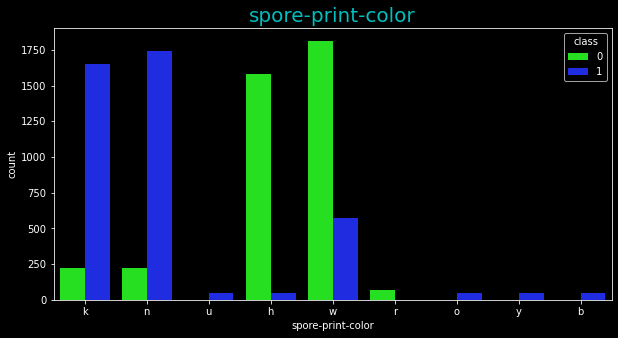

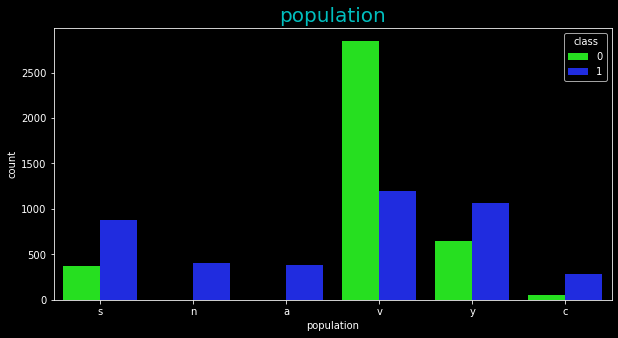

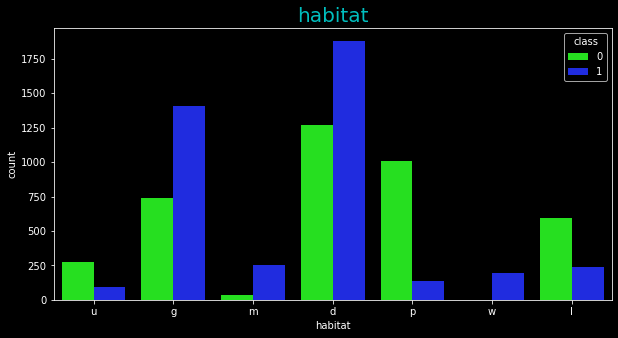

In [10]:
for i in features:
    plt.figure(figsize=(10,5))
    plt.style.use(['seaborn-bright','dark_background'])
    sns.countplot(x = data[i],data = data, hue = 'class', palette='hsv')
    plt.title(i,fontsize=20,color='c')

### Creating dummies for each feature.

In [11]:
data = pd.get_dummies(data)

In [12]:
data.shape

(8124, 118)

In [13]:
x = data.drop(columns='class')
y = data['class']

#### Spliting dataset using sklearn into train and test data.

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 101)

### Importing all the required classifier models.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [16]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SupportVectorClassifier',SVC()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
models.append(('BernoulliNBClassifier',BernoulliNB()))
models.append(('GaussianNBClassifier',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))

In [17]:
from sklearn.metrics import confusion_matrix
model_score = []
for name,model in models:
    model.fit(x_train,y_train)
    ts_score = model.score(x_test,y_test)
    pred = model.predict(x_test)
    print(name)
    print("Train score:",model.score(x_train,y_train),"\nTest score:",ts_score)
    cm = confusion_matrix(y_test,pred)
    print("Confusion Matrix\n",cm)
    model_score.append((name,ts_score))

LogisticRegression
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
DecisionTreeClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
SupportVectorClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
RandomForestClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
AdaBoostClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
ExtraTreesClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]
BernoulliNBClassifier
Train score: 0.9422988152023388 
Test score: 0.9384615384615385
Confusion Matrix
 [[684  90]
 [ 10 841]]
GaussianNBClassifier
Train score: 0.9675334666871827 
Test score: 0.963076923076923
Confusion Matrix
 [[773   1]
 [ 59 792]]
KNeighborsClassifier
Train score: 1.0 
Test score: 1.0
Confusion Matrix
 [[774   0]
 [  0 851]]


#### From above except NBClassifiers all models gives 100% accuracy.

In [18]:
lst = pd.DataFrame(model_score)

In [19]:
st = lst.sort_values(by=1)

In [20]:
st

,0,1
6,BernoulliNBClassifier,0.938462
7,GaussianNBClassifier,0.963077
0,LogisticRegression,1.000000
1,DecisionTreeClassifier,1.000000
2,SupportVectorClassifier,1.000000
3,RandomForestClassifier,1.000000
4,AdaBoostClassifier,1.000000
5,ExtraTreesClassifier,1.000000
8,KNeighborsClassifier,1.000000


Text(0.5, 0, 'Score')

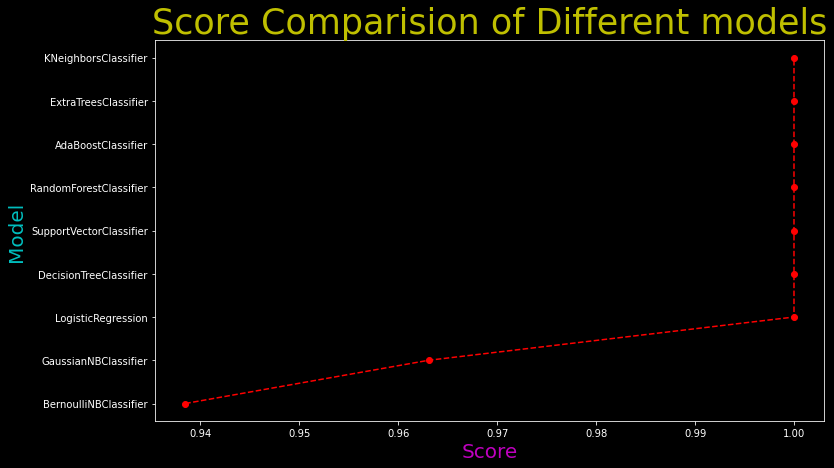

In [21]:
plt.figure(figsize=(12,7))
plt.plot(st[1],st[0],"r--o")
plt.title("Score Comparision of Different models",fontsize=35,color='y')
plt.ylabel("Model",fontsize=20,color='c')
plt.xlabel("Score",fontsize=20,color='m')


### The plot shows that all models are performing very much good.